In [1]:
#%matplotlib widget
import sys
import os
sys.path.insert(0, os.path.join(os.getcwd(), '../core'))
import kaggle_support as kgs
import importlib
import pack_vis
import pack_dimer
import pack_vis_sol
import pack_cost
import numpy as np
import cupy as cp
import copy
kgs.set_float32(True)

local


In [2]:
%load_ext pyinstrument

In [8]:
#%%pyinstrument
import pack_io
importlib.reload(pack_io)
import pandas as pd
theirs = pack_io.dataframe_to_solution_list(pd.read_csv(kgs.code_dir + '../res/71.01.csv'))
for t in theirs[0]:
    t.xyt = t.xyt.astype(kgs.dtype_cp)
    t.h = t.h.astype(kgs.dtype_cp)

In [4]:
import glob
mine_list = [kgs.code_dir + '../res/tess_legalized.pickle'] + glob.glob(kgs.code_dir + '../res/ga_*.pickle')
print(mine_list)
mine_list = [kgs.dill_load(x) for x in mine_list]
for m in mine_list:
    for s in m:
        s.xyt = s.xyt.astype(kgs.dtype_cp)
        s.h = s.h.astype(kgs.dtype_cp)
mine = []
for N_trees in np.arange(1,201):
    best_score = np.inf
    for m in mine_list:
        for s in m:
            if s.N_trees == N_trees:
                score = (s.h[0,0]**2/s.N_trees).get()
                if score < best_score:
                    best_score = score
                    best_sol = s
    mine.append(best_sol)
score = [(x.h[0,0]**2/x.N_trees).get() for x in mine]
mine = (mine,score)

['/mnt/d//packing/code/core/../res/tess_legalized.pickle', '/mnt/d//packing/code/core/../res/ga_1to10.pickle', '/mnt/d//packing/code/core/../res/ga_36_to_36.pickle']


In [ ]:
sol1 = mine[0][6]
sol2 = theirs[0][6]
import pack_io
sol1 = pack_io.legalize(sol1)
sol2 = pack_io.legalize(sol2)


Before optimization:  0.027994191274046898 3.733746645195879e-11 1.6731465


/mnt/d/packing/code/analysis/../core/pack_dynamics.py:60: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  x0 = from_dlpack(x0.toDlpack())
/mnt/d/packing/code/analysis/../core/pack_dynamics.py:92: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  return from_dlpack(tmp_cost[:N].toDlpack()), from_dlpack(res.toDlpack())


After optimization:  0.027774037793278694 7.16304057277739e-05 1.664404
After optimization:  0.027863139286637306 1.8434584490023553e-05 1.6686733
After optimization:  0.027922004461288452 4.810443897440564e-06 1.670844
After optimization:  0.027956778183579445 1.1761736686821678e-06 1.6719929
After optimization:  0.02797468565404415 2.9253504862936097e-07 1.6725547
After optimization:  0.02798379398882389 7.629795106822712e-08 1.6728334
After optimization:  0.027988731861114502 1.8012396907352013e-08 1.6729828
After optimization:  0.027990836650133133 5.9916733796683275e-09 1.673046
After optimization:  0.027992207556962967 1.7948740271833685e-09 1.6730871
After optimization:  0.027993014082312584 4.154863120220398e-10 1.6731113
After optimization:  0.02799336053431034 1.247222880529364e-10 1.6731217
After optimization:  0.027993587777018547 2.4350355065649865e-11 1.6731285
Score of generated dataframe: 0.3999061482359341
Before optimization:  0.02799379453063011 5.784955625642851e-09

/mnt/d/packing/code/analysis/../core/pack_dynamics.py:60: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  x0 = from_dlpack(x0.toDlpack())
/mnt/d/packing/code/analysis/../core/pack_dynamics.py:92: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  return from_dlpack(tmp_cost[:N].toDlpack()), from_dlpack(res.toDlpack())


After optimization:  0.027766546234488487 7.538746285717934e-05 1.6640661
After optimization:  0.027860525995492935 1.897333095257636e-05 1.6685789
After optimization:  0.027922561392188072 4.731966328108683e-06 1.6708629
After optimization:  0.027957184240221977 1.215296492773632e-06 1.6720039
After optimization:  0.02797463722527027 3.608933525356406e-07 1.6725513
After optimization:  0.02798590064048767 8.68274909748834e-08 1.6728961
After optimization:  0.02799142524600029 2.2167283120211323e-08 1.6730632
After optimization:  0.02799397148191929 7.004173241398348e-09 1.6731397
After optimization:  0.027995640411973 1.6575041339450536e-09 1.6731898
After optimization:  0.027996400371193886 4.0416286983813166e-10 1.6732125
After optimization:  0.02799677476286888 1.1353018525284142e-10 1.6732237
After optimization:  0.027996987104415894 2.975941715277486e-11 1.67323
Score of generated dataframe: 0.3999542654478104


In [17]:
sol1_scored = pack_io.solution_list_to_dataframe([sol1], compact=True)
sol2_scored = pack_io.solution_list_to_dataframe([sol2], compact=True)

Score of generated dataframe: 0.3998945679847518
Score of generated dataframe: 0.3999437283220296


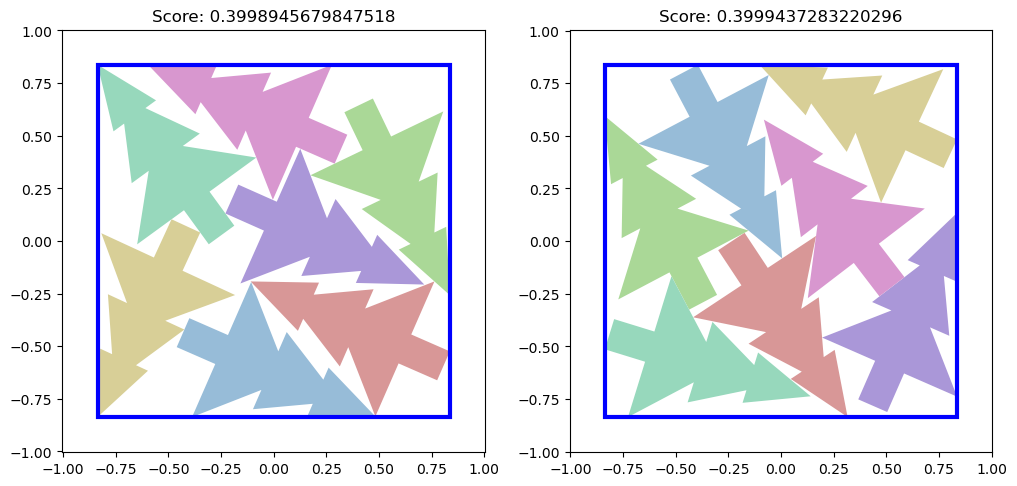

In [24]:
import matplotlib.pyplot as plt
#importlib.reload(kgs)
for N in [7]:
    _,ax = plt.subplots(1,2,figsize=(12,6))
    plt.sca(ax[0])
    pack_vis_sol.pack_vis_sol(sol1, solution_idx=0, ax=ax[0])    
    plt.title('Score: 0.3998945679847518')    
    sol3 = copy.deepcopy(sol2)
    sol3.xyt[0,...] = kgs.find_best_transformation(sol1.xyt[0], sol2.xyt[0])[0]
    plt.sca(ax[1])
    pack_vis_sol.pack_vis_sol(sol2, solution_idx=0, ax=ax[1])
    plt.title('Score: 0.3999437283220296')
    # sol2 = copy.deepcopy(theirs[0][N-1])
    # sol2.xyt[0,...] = kgs.find_best_transformation(mine[0][N-1].xyt[0], sol2.xyt[0])[0]
    # sol2.snap()
    # #sol2.xyt = cp.concatenate((overall_best[N-1].xyt, sol2.xyt), axis=1)
    # pack_vis_sol.pack_vis_sol(sol2, solution_idx=0, ax=ax[1])
    # plt.sca(ax[1])
    # plt.title(theirs[1][N-1])
    # plt.suptitle(N)

In [15]:
sol1_scored

,id,x,y,deg
0,007_0,s0.623249146021905,s-0.5131746190905365,s426.36968994140625
1,007_1,s-0.5008468042101174,s-0.11038012659121613,s155.20130920410156
2,007_2,s0.49012302620050086,s0.4633155182750884,s565.6725463867188
3,007_3,s-0.36539181501249196,s0.18980899327461886,s36.068511962890625
4,007_4,s-0.24727184694114152,s-0.5159742332350992,s-113.63018798828125
5,007_5,s-0.01586251325237501,s0.11756522027592888,s246.03953552246094
6,007_6,s0.1363642632940333,s0.51579262278826,s66.36995697021484
